## Exploratory Data Analysis

1. Data Cleaning
2. Data Transformation
3. Aggregation and FIltering

#### Something that we interest
- Relationship between variables (correlations)
- Distribution of variables (histogram, boxplot)
- Outliers and anomaly

#### Task 1: Data Cleaning, Aggregation, and Filtering

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
df = pd.DataFrame(data)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Menghitung persentase missing values per kolom
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [7]:
# Menghitung jumlah duplikat
duplicate_count = df.duplicated().sum()

print(f"Jumlah baris duplikat: {duplicate_count}")

Jumlah baris duplikat: 0


In [8]:
# Missing value Handling
df["Age"] = df["Age"].fillna(df["Age"].median())

df = df.drop(columns=['Cabin'])

# Hapus baris yg null pada Embarked karena di bawah 1 persen
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
# Look at passanger in first_class
first_class = df[df["Pclass"] == 1]
print(f"Passanger with first class: \n {first_class}")

Passanger with first class: 
      PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
..                                     

#### Task 2: Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

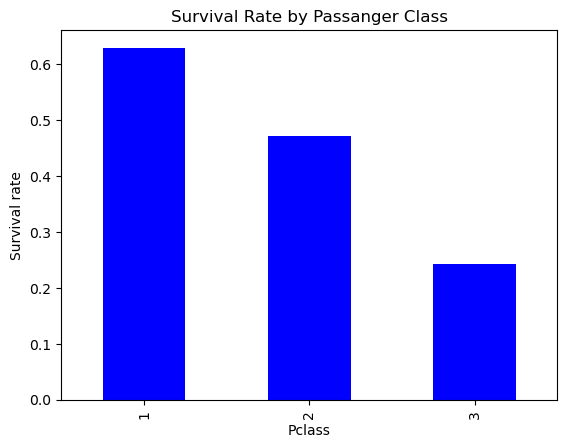

In [15]:
# bar plot: survival rate  by class passanger
survival_by_class = df.groupby("Pclass")["Survived"].mean()
survival_by_class.plot(kind="bar", color="blue")
plt.title("Survival Rate by Passanger Class")
plt.ylabel("Survival rate")
plt.show()

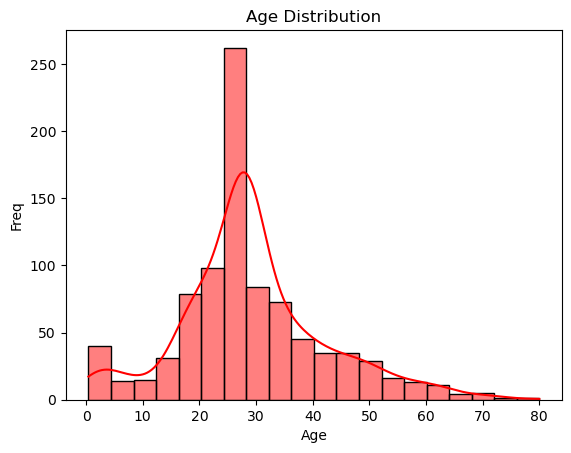

In [16]:
# Histogram plot for age distribution
sns.histplot(df["Age"], kde=True, bins=20, color="red")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Freq")
plt.show()

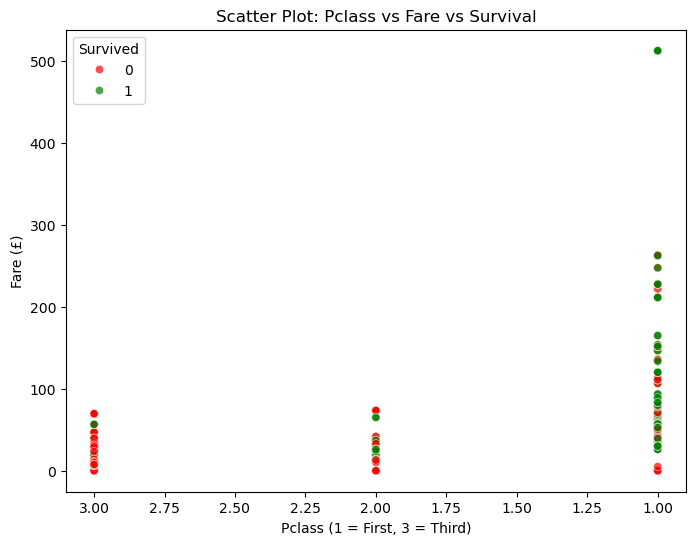

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Pclass'], y=df['Fare'], hue=df['Survived'], palette={0: 'red', 1: 'green'}, alpha=0.7)
plt.xlabel('Pclass (1 = First, 3 = Third)')
plt.ylabel('Fare (£)')
plt.title('Scatter Plot: Pclass vs Fare vs Survival')
plt.gca().invert_xaxis()  # Membalikkan sumbu X agar Pclass 1 di kiri
plt.show()

#### SUmmary